In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
redwine_df   = pd.read_csv("winequality-red.csv",   sep = ';')
whitewine_df = pd.read_csv("winequality-white.csv", sep = ';')

In [3]:
redwine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
redwine_df.shape

(1599, 12)

In [5]:
whitewine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
whitewine_df.shape

(4898, 12)

In [7]:
redwine_df   = redwine_df.assign(wine   = 'red wine')
whitewine_df = whitewine_df.assign(wine = 'white wine')
wine_df = pd.concat([redwine_df,whitewine_df],ignore_index = True)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red wine
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red wine
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red wine
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red wine
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red wine


In [8]:
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white wine
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white wine
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white wine
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white wine
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white wine


In [9]:
wine_df.shape

(6497, 13)

In [10]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [11]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [12]:
wine_df= wine_df[ [ col for col in wine_df.columns if col != 'quality' ] + ['quality']]
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red wine,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,red wine,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,red wine,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,red wine,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red wine,5


In [13]:
null_values = wine_df.isnull().sum()
null_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
wine                    0
quality                 0
dtype: int64

In [14]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine', 'quality'],
      dtype='object')

In [15]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
wine                     object
quality                   int64
dtype: object

In [16]:
wine_num   = wine_df.select_dtypes(include = ['float64', 'int64'])
wine_corr  = wine_num.corr()['quality'][:-1]
top_features = wine_corr[abs(wine_corr) > 0.3].sort_values(ascending = False)
print("There are {} correlated with quality: \n{}".format(len(top_features),top_features))

There are 2 correlated with quality: 
alcohol    0.444319
density   -0.305858
Name: quality, dtype: float64


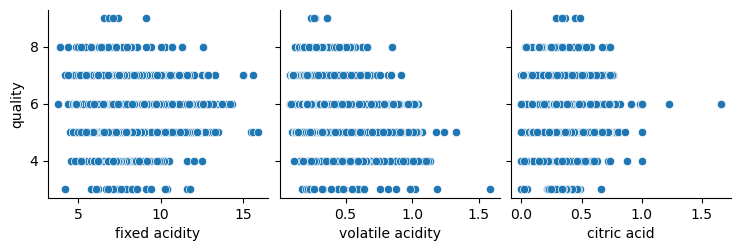

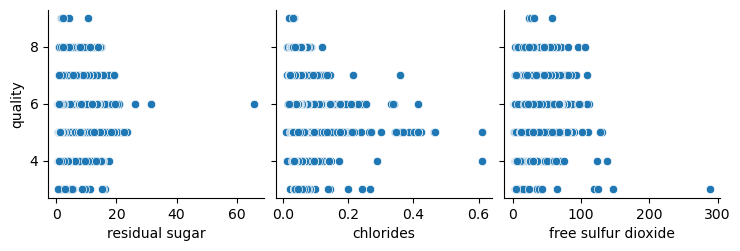

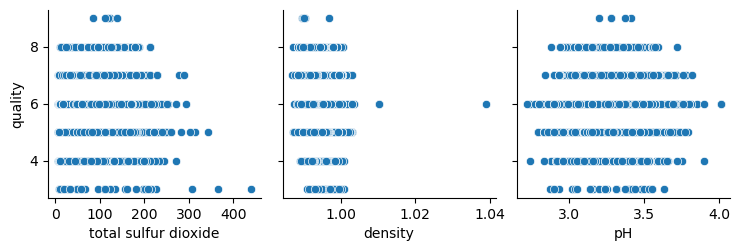

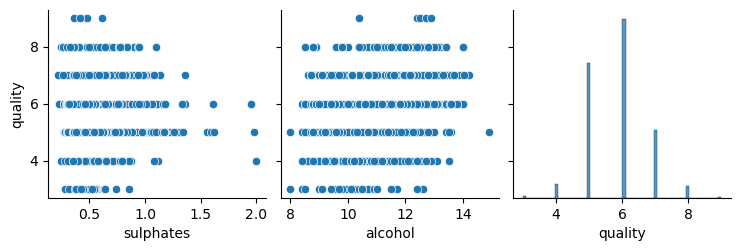

In [17]:
for i in range(0, len(wine_num.columns), 3):
    sns.pairplot(data=wine_num,
                x_vars=wine_num.columns[i:i+3],
                y_vars=['quality'])

In [18]:
wine_df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

<AxesSubplot:ylabel='count'>

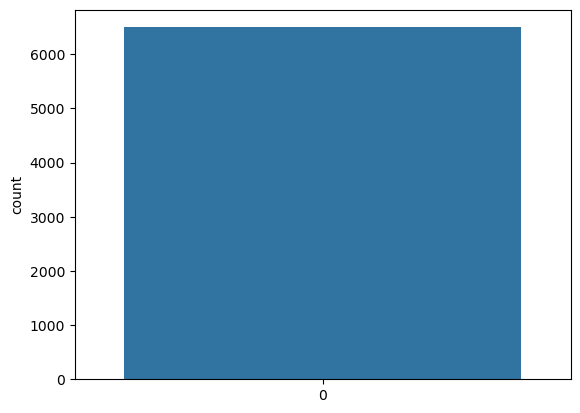

In [19]:
sns.countplot(wine_df.quality)

<AxesSubplot:xlabel='quality', ylabel='count'>

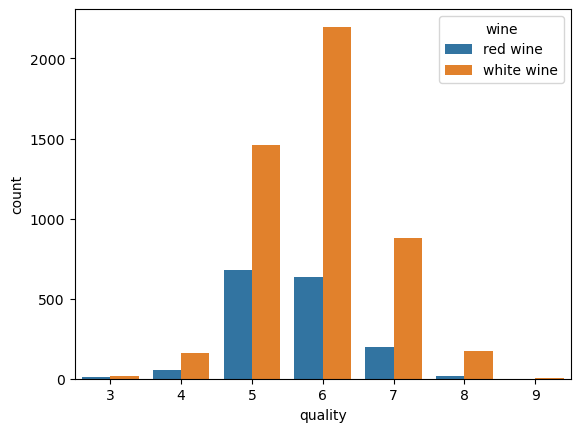

In [20]:
sns.countplot(x = wine_df.quality, hue = wine_df.wine)

In [21]:
wine_df.wine.value_counts()

white wine    4898
red wine      1599
Name: wine, dtype: int64

In [22]:
pd.crosstab(wine_df['wine'],wine_df['quality'])

quality,3,4,5,6,7,8,9
wine,,,,,,,
red wine,10,53,681,638,199,18,0
white wine,20,163,1457,2198,880,175,5


C:\Users\Anchal\AppData\Local\Temp\ipykernel_240\4271675755.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  wine = sns.distplot(wine_df.select_dtypes(include = ['float64', 'int64']))
C:\Users\Anchal\AppData\Local\Temp\ipykernel_240\4271675755.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wine_skew = wine_df.skew()


fixed acidity           1.723290
volatile acidity        1.495097
citric acid             0.471731
residual sugar          1.435404
chlorides               5.399828
free sulfur dioxide     1.220066
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
quality                 0.189623
dtype: float64

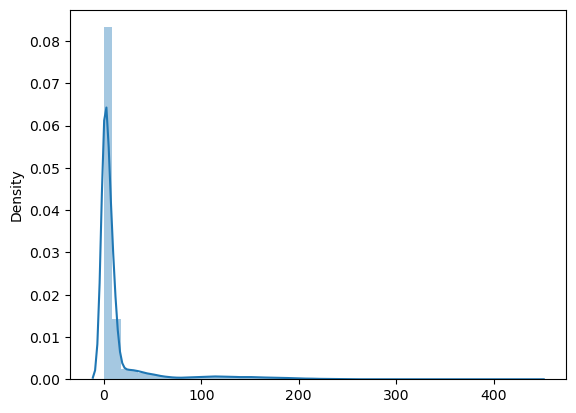

In [23]:
wine = sns.distplot(wine_df.select_dtypes(include = ['float64', 'int64']))
wine_skew = wine_df.skew()
wine_skew

In [24]:
skewed_cols = wine_skew[abs(wine_df.skew())>0.5]
print("There are {} skewed : \n{}".format(len(skewed_cols),skewed_cols))

There are 8 skewed : 
fixed acidity          1.723290
volatile acidity       1.495097
residual sugar         1.435404
chlorides              5.399828
free sulfur dioxide    1.220066
density                0.503602
sulphates              1.797270
alcohol                0.565718
dtype: float64


C:\Users\Anchal\AppData\Local\Temp\ipykernel_240\1199110272.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewed_cols = wine_skew[abs(wine_df.skew())>0.5]


In [25]:
def skew(x):
    print("Before transformation: ", wine_df[x].skew())
    wine_df[x] = np.log(wine_df[x])
    print("After transformation: ", wine_df[x].skew())
    return sns.distplot(wine_df[x])

Before transformation:  1.7232896467669239
After transformation:  0.889137189461695


C:\Users\Anchal\AppData\Local\Temp\ipykernel_240\1006476279.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  return sns.distplot(wine_df[x])


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

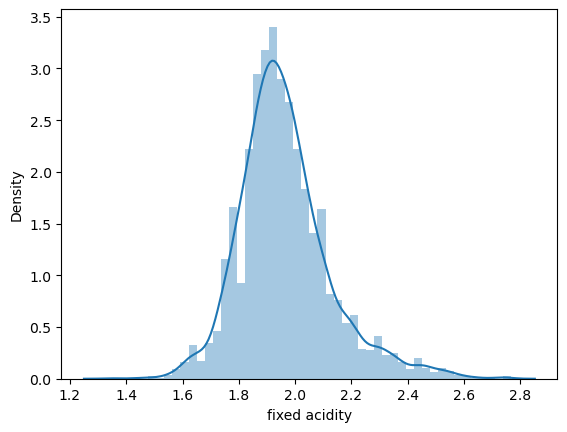

In [26]:
skew('fixed acidity')

Before transformation:  1.4950965423685545
After transformation:  0.32779891965379654


C:\Users\Anchal\AppData\Local\Temp\ipykernel_240\1006476279.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  return sns.distplot(wine_df[x])


<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

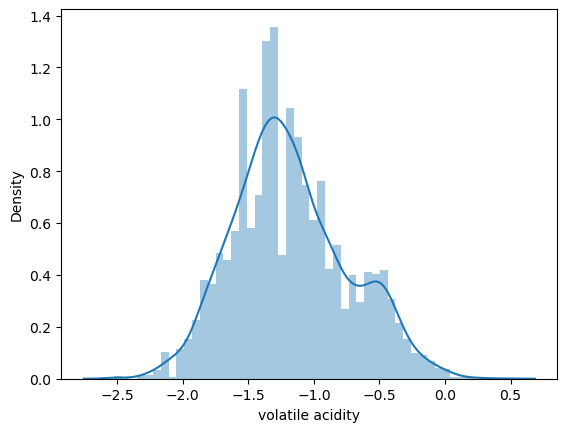

In [27]:
skew('volatile acidity')

Before transformation:  1.4354042627889907
After transformation:  0.24069157405329122


C:\Users\Anchal\AppData\Local\Temp\ipykernel_240\1006476279.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  return sns.distplot(wine_df[x])


<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

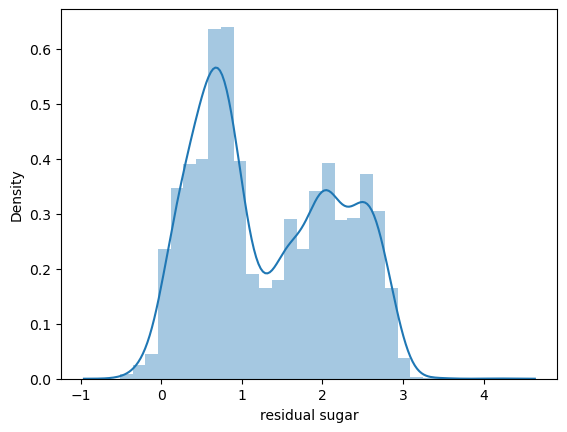

In [28]:
skew('residual sugar')

Before transformation:  5.399827731969901
After transformation:  0.8764721609236936


C:\Users\Anchal\AppData\Local\Temp\ipykernel_240\1006476279.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  return sns.distplot(wine_df[x])


<AxesSubplot:xlabel='chlorides', ylabel='Density'>

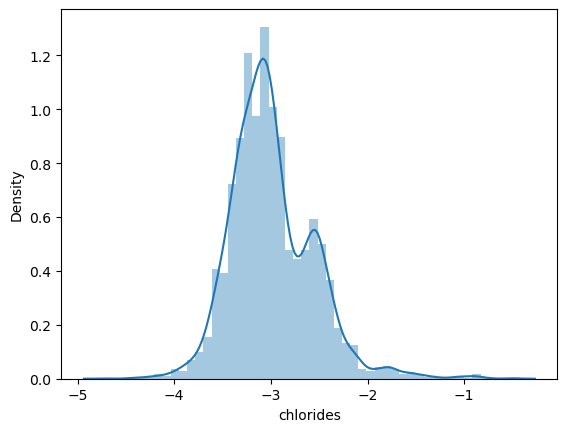

In [29]:
skew('chlorides')

Before transformation:  1.2200660740665203
After transformation:  -0.8341971166713793


C:\Users\Anchal\AppData\Local\Temp\ipykernel_240\1006476279.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  return sns.distplot(wine_df[x])


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

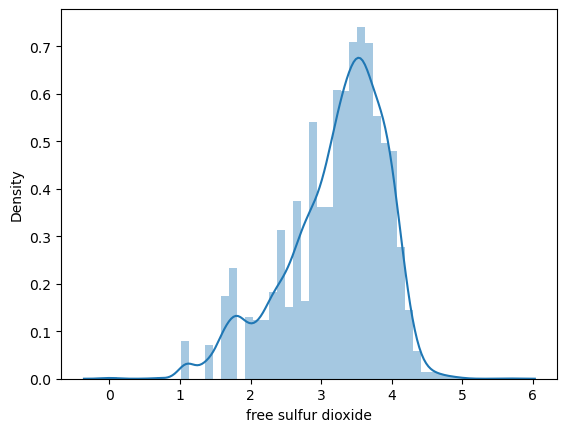

In [30]:
skew('free sulfur dioxide')

Before transformation:  0.5036017301419993
After transformation:  0.4673678543235909


C:\Users\Anchal\AppData\Local\Temp\ipykernel_240\1006476279.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  return sns.distplot(wine_df[x])


<AxesSubplot:xlabel='density', ylabel='Density'>

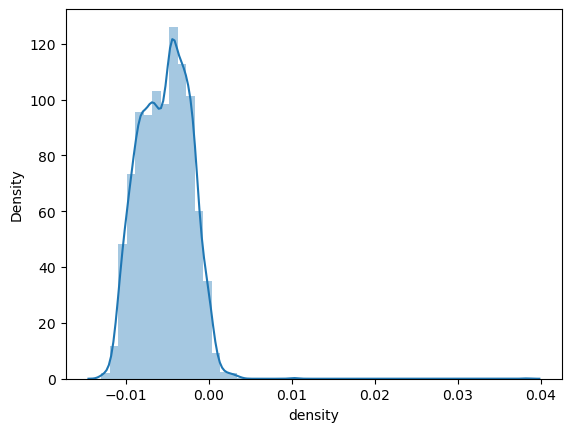

In [31]:
skew('density')

Before transformation:  1.7972700037785152
After transformation:  0.40499209559999194


C:\Users\Anchal\AppData\Local\Temp\ipykernel_240\1006476279.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  return sns.distplot(wine_df[x])


<AxesSubplot:xlabel='sulphates', ylabel='Density'>

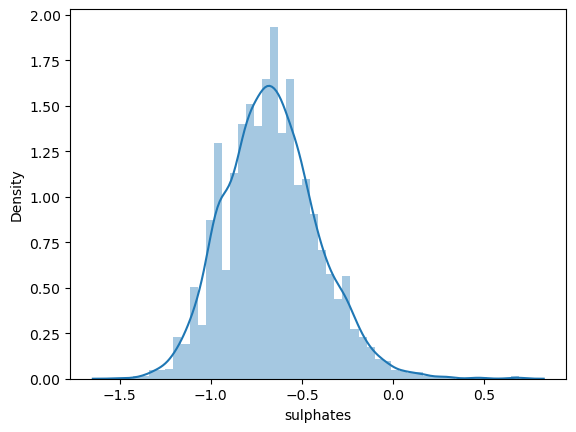

In [32]:
skew('sulphates')

Before transformation:  0.565717729098518
After transformation:  0.38185978754069166


C:\Users\Anchal\AppData\Local\Temp\ipykernel_240\1006476279.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  return sns.distplot(wine_df[x])


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

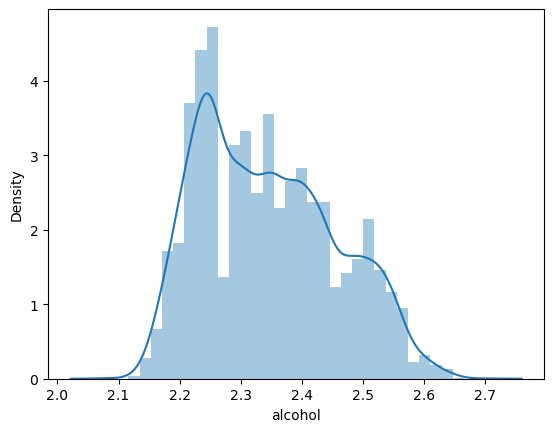

In [33]:
skew('alcohol')

In [34]:
skewed_cols = wine_skew[abs(wine_df.skew())>0.5]
print("There are {} skewed : \n{}".format(len(skewed_cols),skewed_cols))

There are 3 skewed : 
fixed acidity          1.723290
chlorides              5.399828
free sulfur dioxide    1.220066
dtype: float64


C:\Users\Anchal\AppData\Local\Temp\ipykernel_240\1199110272.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewed_cols = wine_skew[abs(wine_df.skew())>0.5]


<AxesSubplot:>

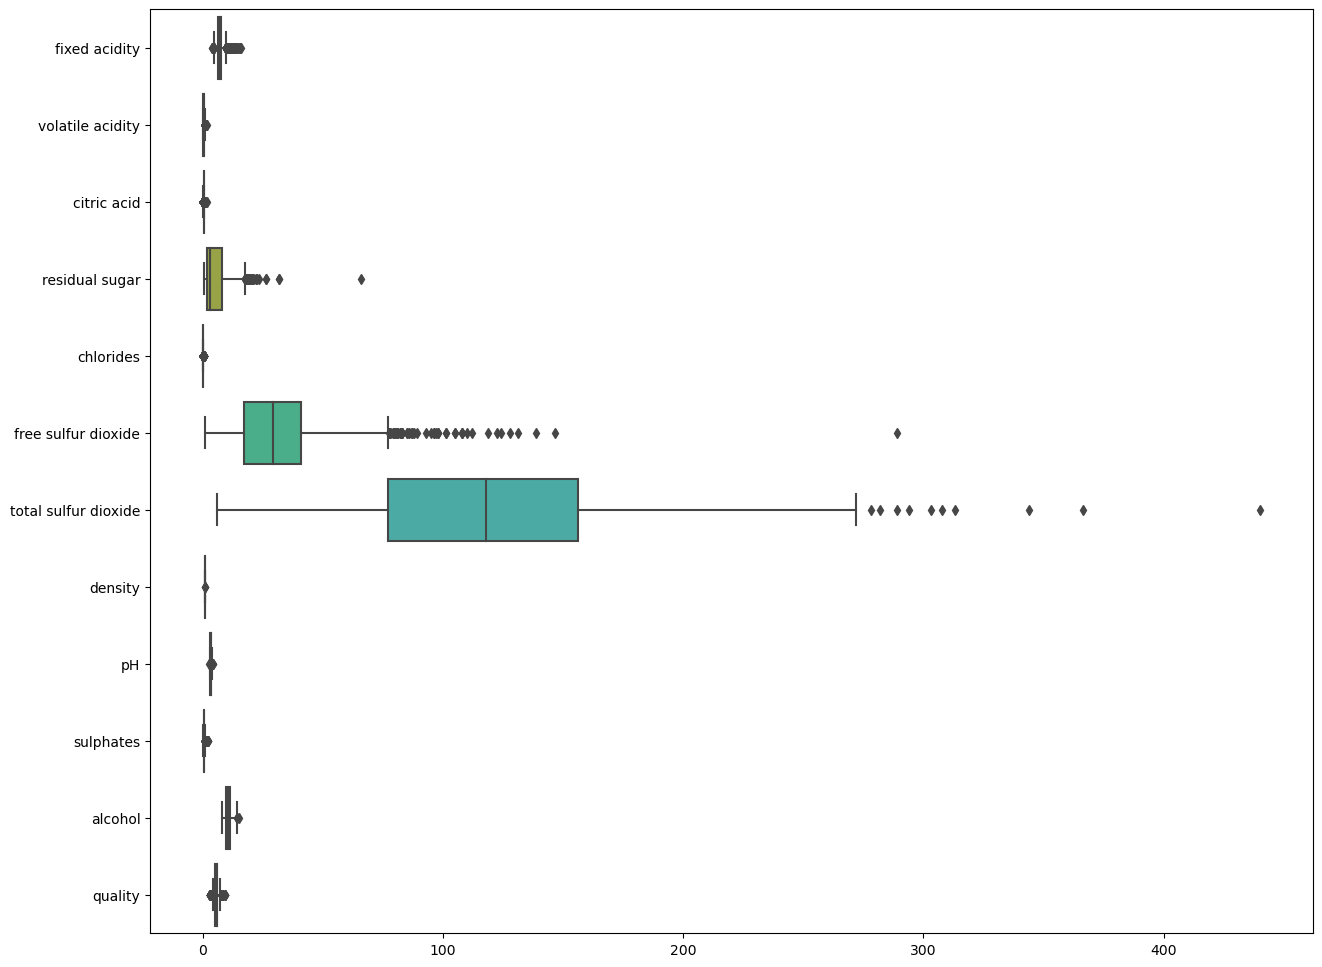

In [35]:
plt.subplots(figsize = (15,12))
sns.boxplot(data = wine_num, orient ='h')

In [36]:
def outliers(x):
    print("Before transformation")
    sns.boxplot(wine_df['fixed acidity'])
    plt.show()
    for i in wine_df[x]:
        q1 = wine_df[x].quantile(0.25)
        q3 = wine_df[x].quantile(0.75)
        iqr = q3-q1
        low_lim = q1 - 1.5*iqr
        up_lim  = q3 + 1.5*iqr
        if i> up_lim or i< low_lim:
            wine_df[x] = wine_df[x].replace(i,np.mean(wine_df[x]))
    print("After transformation")
    sns.boxplot(wine_df[x])

Before transformation


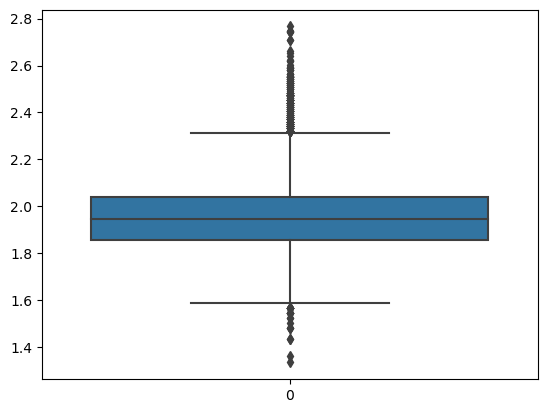

After transformation


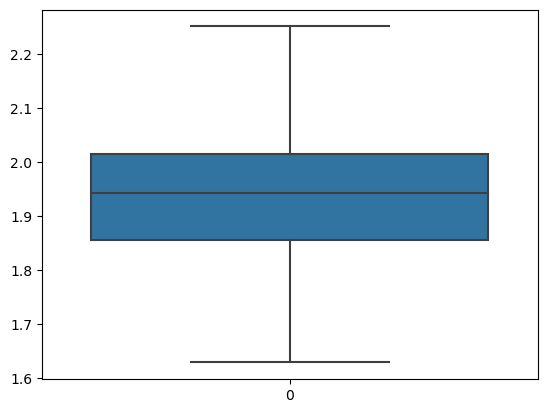

In [37]:
outliers('fixed acidity')

Before transformation


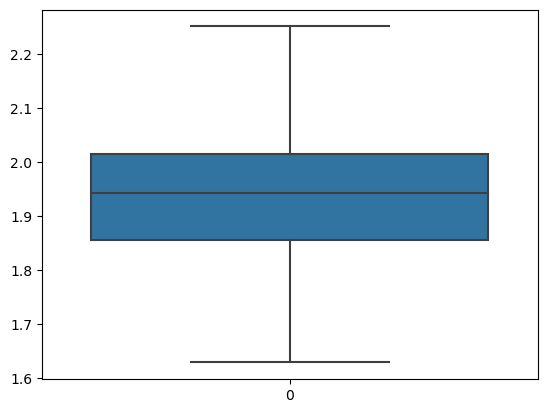

After transformation


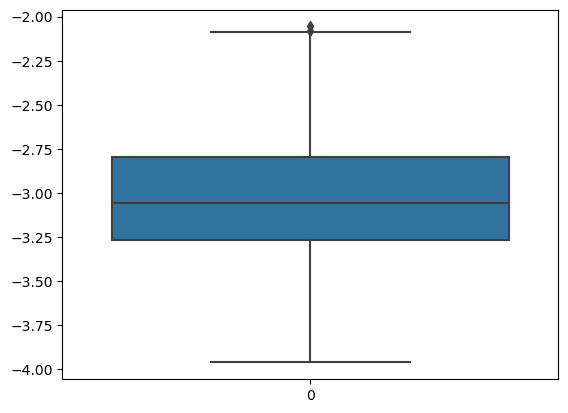

In [38]:
outliers('chlorides')

Before transformation


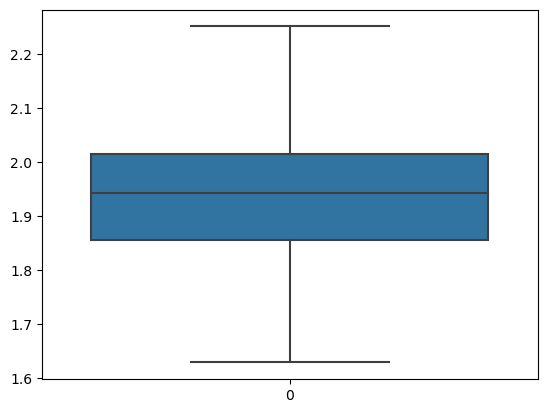

After transformation


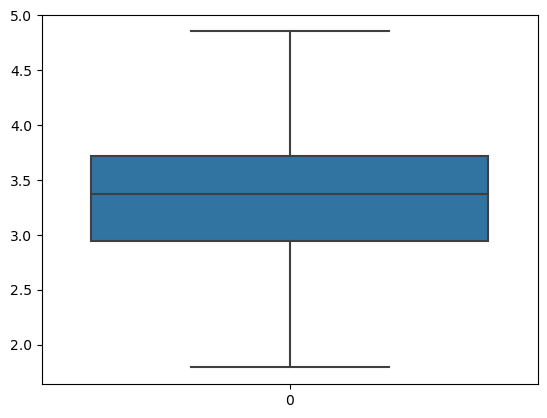

In [39]:
outliers('free sulfur dioxide')

In [40]:
skewed_cols = wine_skew[abs(wine_df.skew())>0.5]
print("There are {} skewed : \n{}".format(len(skewed_cols),skewed_cols))

There are 1 skewed : 
free sulfur dioxide    1.220066
dtype: float64


C:\Users\Anchal\AppData\Local\Temp\ipykernel_240\1199110272.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewed_cols = wine_skew[abs(wine_df.skew())>0.5]


In [41]:
wine_df.dtypes[wine_df.dtypes == np.object] 

C:\Users\Anchal\AppData\Local\Temp\ipykernel_240\1833273635.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  wine_df.dtypes[wine_df.dtypes == np.object]


wine    object
dtype: object

In [42]:
def encoding(x):
    encoder = LabelEncoder()
    print("Before encoding: ",wine_df[x].unique())
    wine_df[x] = encoder.fit_transform(wine_df[x])
    print("After encoding: ")
    return wine_df[x].unique()

In [43]:
encoding('wine')

Before encoding:  ['red wine' 'white wine']
After encoding: 


array([0, 1])

<AxesSubplot:>

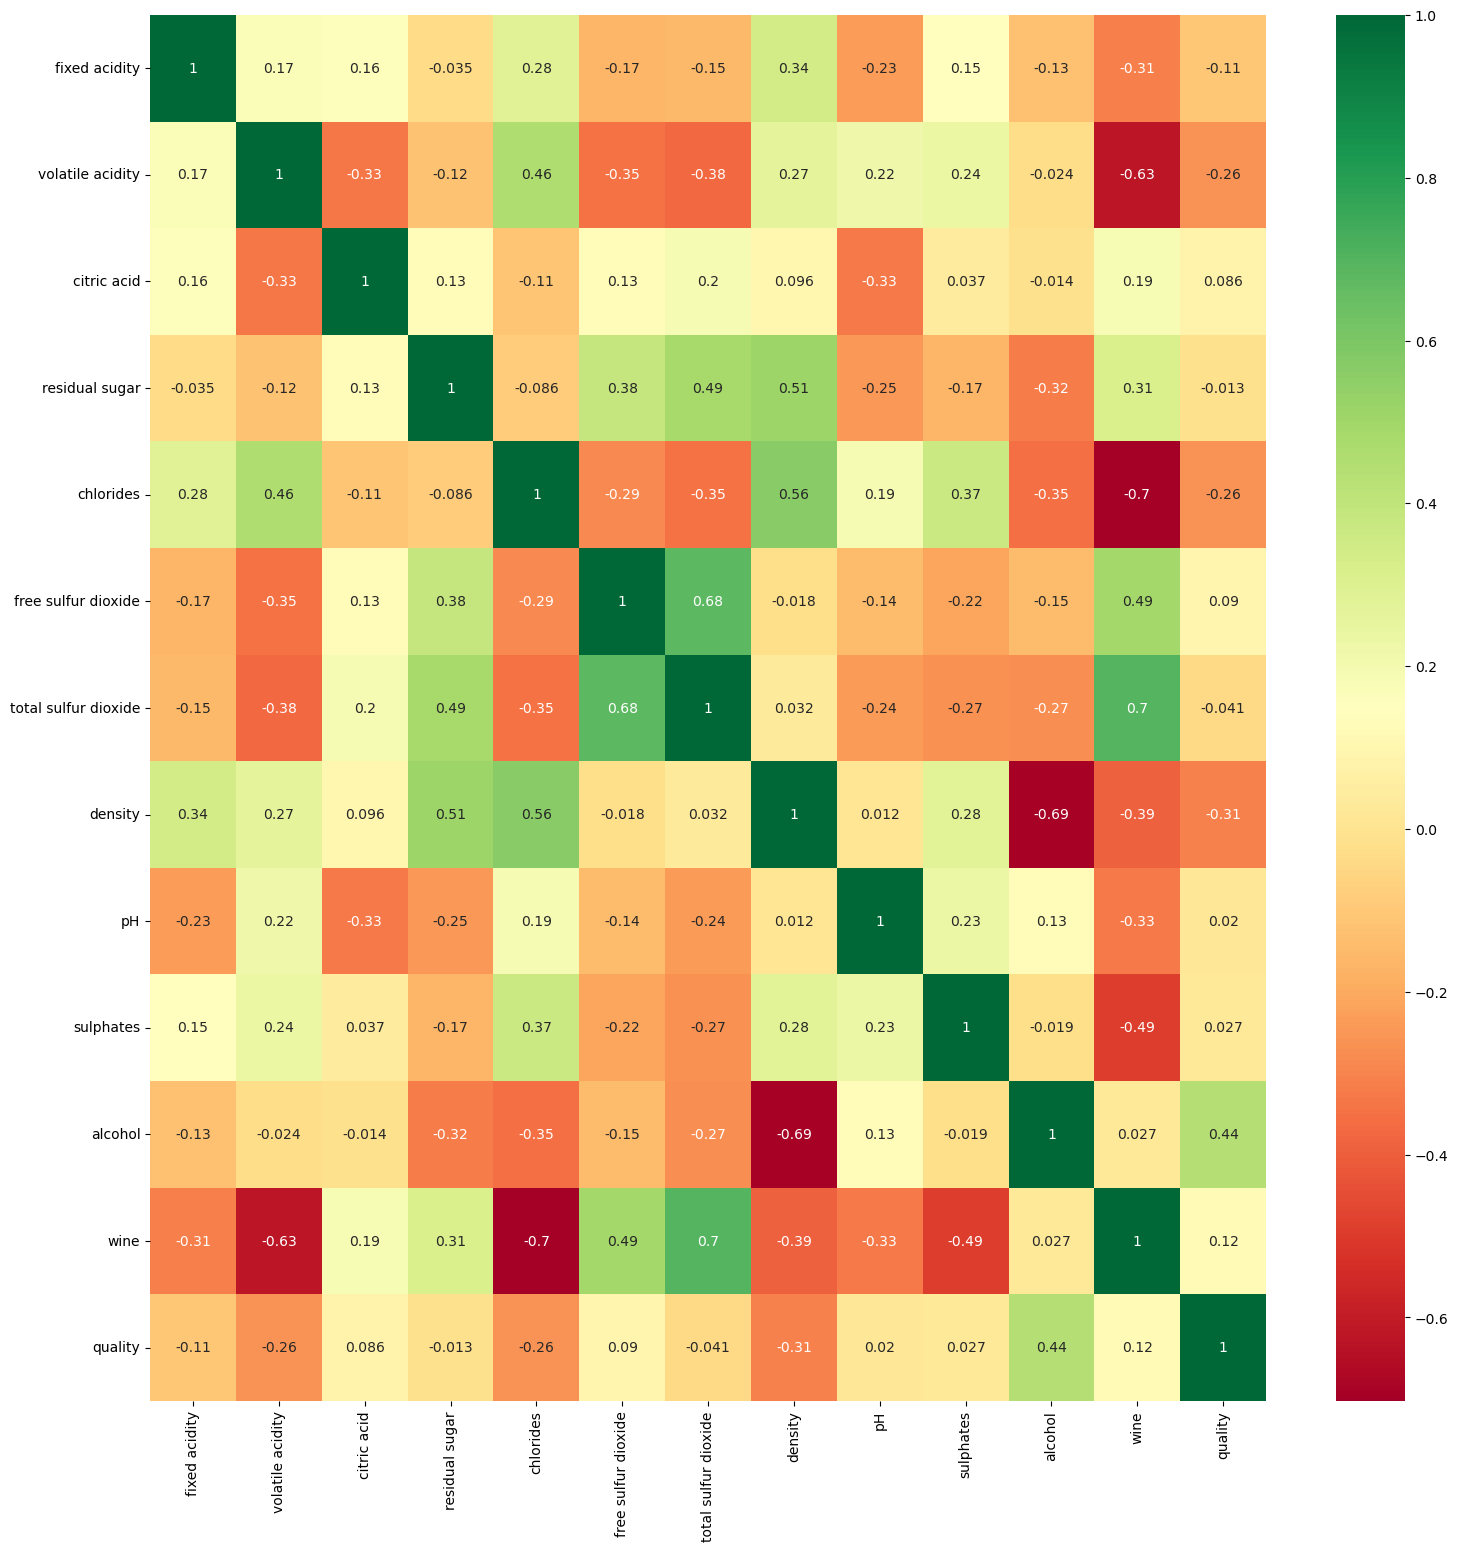

In [44]:
wine = wine_df.loc[:,['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine', 'quality']]
plt.figure(figsize=(18,18))
sns.heatmap(wine.corr(),
            annot = True,
            cmap = 'RdYlGn')

In [45]:
wine_df = wine_df.drop('total sulfur dioxide', axis=1)

In [46]:
feature = wine.corr()['quality'].sort_values()
feature

density                -0.306359
volatile acidity       -0.262738
chlorides              -0.260863
fixed acidity          -0.107621
total sulfur dioxide   -0.041385
residual sugar         -0.012986
pH                      0.019506
sulphates               0.027437
citric acid             0.085532
free sulfur dioxide     0.090360
wine                    0.119323
alcohol                 0.440520
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:>

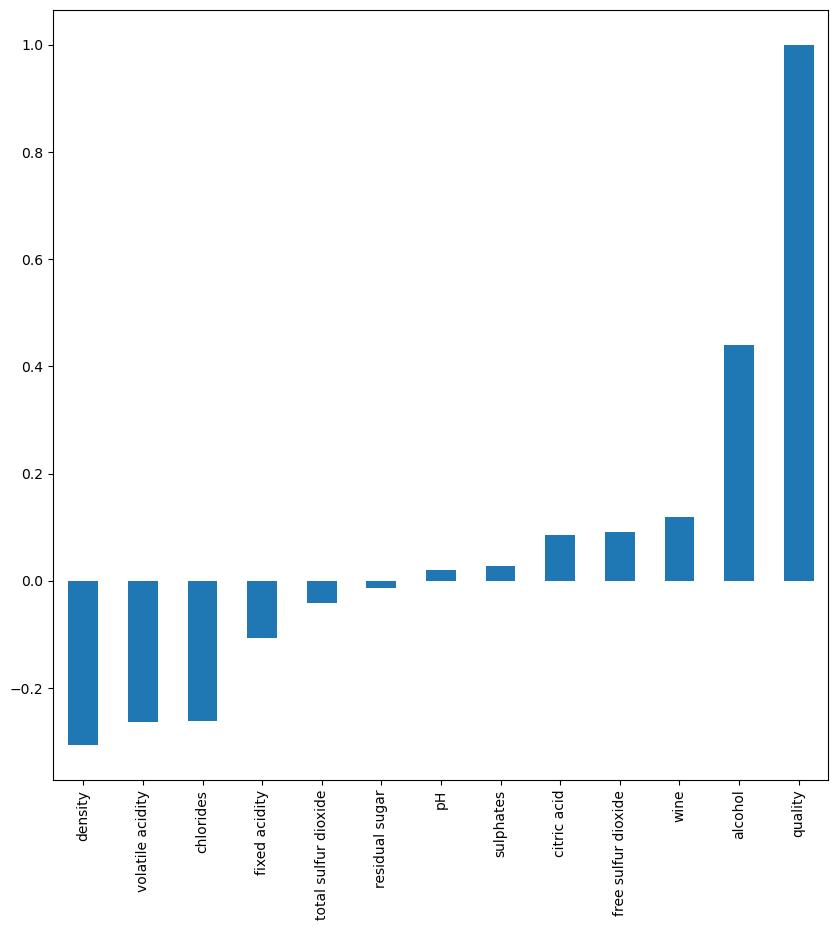

In [47]:
feature.plot(kind = 'bar', figsize=(10,10))

In [48]:
x =  wine_df.loc[:,['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine']]
y = wine_df['quality']
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.51175361,  1.87607166, -2.19283252, ...,  0.33847207,
        -0.93085281, -1.75018984],
       [ 0.95501727,  2.39733608, -2.19283252, ...,  1.09383408,
        -0.55644829, -1.75018984],
       [ 0.95501727,  2.06339687, -1.91755268, ...,  0.91829348,
        -0.55644829, -1.75018984],
       ...,
       [-0.58014212, -0.56222231, -0.88525328, ..., -0.42682735,
        -0.93085281,  0.57136659],
       [-1.98674841, -0.13115937, -0.12823371, ..., -1.17012581,
         1.84295277,  0.57136659],
       [-1.25410694, -0.86638542,  0.42232597, ..., -1.8387075 ,
         1.11211034,  0.57136659]])

In [49]:
pca = PCA()
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >=0.95)+1
d

9

In [50]:
pca = PCA(n_components = 0.95)
x_reduced  = pca.fit_transform(x)

In [51]:
wine_df['best quality'] = [ 1 if x>=5 else 0 for x in wine_df.quality] 
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,wine,quality,best quality
0,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,-0.002202,3.51,-0.579818,2.240710,0,5,1
1,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,-0.003205,3.20,-0.385662,2.282382,0,5,1
2,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,-0.003005,3.26,-0.430783,2.282382,0,5,1
3,1.962001,-1.272966,0.56,0.641854,-2.590267,2.833213,-0.002002,3.16,-0.544727,2.282382,0,6,1
4,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,-0.002202,3.51,-0.579818,2.240710,0,5,1


In [52]:
wine_df = wine_df.drop(['quality'],axis =1)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,wine,best quality
0,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,-0.002202,3.51,-0.579818,2.240710,0,1
1,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,-0.003205,3.20,-0.385662,2.282382,0,1
2,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,-0.003005,3.26,-0.430783,2.282382,0,1
3,1.962001,-1.272966,0.56,0.641854,-2.590267,2.833213,-0.002002,3.16,-0.544727,2.282382,0,1
4,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,-0.002202,3.51,-0.579818,2.240710,0,1


In [54]:
wine_df['best quality'].value_counts()

AttributeError: 'Series' object has no attribute 'values_count'

In [53]:
wine_df.to_csv('clean_data.csv')